<a href="https://colab.research.google.com/github/Sulaiman29/BDA_HW5/blob/main/Copy_of_BDA2025Spring_HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-info"><b></b>
<h1><center> <font color='black'> Homework 05</font></center></h1>
<h2><center> <font color='black'> A/B Testing & Uplift modelling</font></center></h2>    
<h2><center> <font color='black'> MTAT.03.319 - Business Data Analytics</font></center></h2>
<h2><center> <font color='black'> University of Tartu</font></center></h2>
</div>

# Homework instructions

- Please provide the names and student IDs of the team-members (Maximum 2 person) in the field "Team mates" below. If you are not working in a team please insert only your name and student ID.

- Please provide code where ever applicable.

- The accepted submission format is .ipynb file. If you are sharing Colab link, make sure that the privacy settings for the file is public so we can access your code.

- The submission will automatically close on <font color='red'>**18 May at 23:59**</font>, so please make sure to submit before the deadline.

- ONLY one of the teammates should submit the homework and in the submission description the other person's Name and Student ID must be entered. We will grade the homework and the marks and feedback is applied for both the team members. So please communicate with your team member about marks and feedback if you are submit the homework.

- If a question is not clear, please ask us in Moodle ONLY.

- After you have finished solving the Homework, please restart the Kernel and run all the cells to check if there is any persisting issues.

- Plagiarism is <font color='red'>**PROHIBITED**</font>. Any form of plagiarism will be dealt according to the university policy (https://ut.ee/en/content/academic-fraud).

- <font color='red'>**DO NOT CHANGE THE TEMPLATE**</font>

- <font color='red'>**Restart the Kernel and Run all the cells once again after you are done.**</font>
This will ensure that all the cells run without error. You will find an option in the top menu bar under Kernel tab.

**<h2><font color='red'>Team mates:</font></h2>**


<font color='red'>Name: </font>&emsp;   <font color='red'>Student ID: </font>


<font color='red'>Name: </font>&emsp;   <font color='red'>Student ID: </font>



### The homework is divided into two sections and the points are distributed as below:
<pre>
- A/B Testing               -> 5.5 points
- Uplift modeling           -> 5.5 points
________________________________________________
Total                       -> 11.0 points
</pre>

# 1. A/B Testing (5.5 points)


**1.1 Use `AB_clicks.csv` data and find whether Learn, Help, and Services versions of the page compared to the Interact have significantly more (or less) clicks (compare distributions between versions). Justify the choice of the performed tests and interpret the result of the test. (1.5 points)**

=== Summary Statistics ===
          count       mean  median         std
version                                       
Connect      58  27.362069     3.0   82.645661
Help         57  30.122807     3.0   97.302927
Interact     69  53.826087     5.0  192.440820
Learn        62  26.645161     3.0   86.024986
Services     53  25.433962     3.0   71.085136

=== Shapiro–Wilk Normality (p-values) ===
Connect : W=0.348, p=1.306e-14
Help    : W=0.322, p=9.141e-15
Interact: W=0.288, p=1.339e-16
Learn   : W=0.316, p=1.837e-15
Services: W=0.376, p=1.149e-13

=== Mann–Whitney U Test Results (Bonferroni) ===
          U_stat  p_raw  p_adj  significant
variant                                    
learn        NaN    NaN    NaN        False
help         NaN    NaN    NaN        False
services     NaN    NaN    NaN        False


<ipython-input-3-8ca37d09c00b>:42: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p = mannwhitneyu(grp, control, alternative='two-sided')


<Figure size 800x600 with 0 Axes>

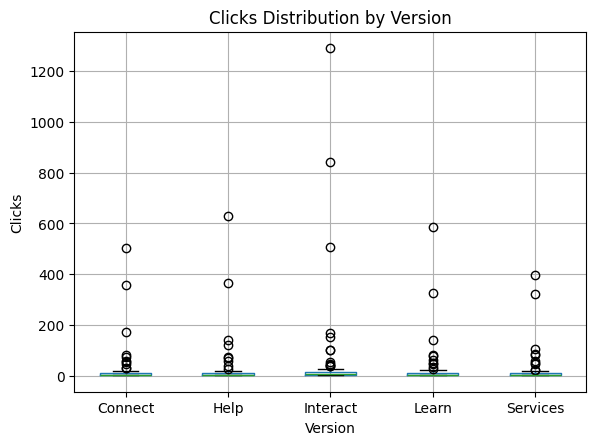

In [3]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, mannwhitneyu
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv(
    'AB_clicks.csv',
    sep=None,
    engine='python',
    encoding='utf-8-sig'
)
# normalize column names
df.columns = df.columns.str.strip().str.lower()
# rename if necessary
if 'no_clicks' in df.columns:
    df = df.rename(columns={'no_clicks': 'clicks'})
if 'version' not in df.columns:
    df = df.rename(columns={'version'.upper(): 'version'})

# ensure numeric
df['clicks'] = pd.to_numeric(df['clicks'], errors='coerce')

# Summary statistics
summary = df.groupby('version')['clicks'].agg(['count','mean','median','std'])
print("=== Summary Statistics ===")
print(summary)

# Shapiro–Wilk normality tests
print("\n=== Shapiro–Wilk Normality (p-values) ===")
for version, grp in df.groupby('version'):
    stat, p = shapiro(grp['clicks'])
    print(f"{version:8s}: W={stat:.3f}, p={p:.3e}")

# Mann–Whitney U vs. Interact + Bonferroni correction
alpha = 0.05
control = df[df['version']=='interact']['clicks']

results = []
for variant in ['learn','help','services']:
    grp = df[df['version']==variant]['clicks']
    stat, p = mannwhitneyu(grp, control, alternative='two-sided')
    p_adj = min(p * 3, 1.0)
    results.append({
        'variant': variant,
        'U_stat': stat,
        'p_raw': p,
        'p_adj': p_adj,
        'significant': p_adj < alpha
    })

res_df = pd.DataFrame(results).set_index('variant')
print("\n=== Mann–Whitney U Test Results (Bonferroni) ===")
print(res_df)

# Boxplot of click distributions
plt.figure(figsize=(8,6))
df.boxplot(column='clicks', by='version')
plt.title('Clicks Distribution by Version')
plt.suptitle('')
plt.xlabel('Version')
plt.ylabel('Clicks')
plt.show()


**1.2 Use two different methods to test the normality of two different versions of your choice (Connect, Help, Services,..) (2.0 points)**





Counts per version:
version
Interact    69
Learn       62
Connect     58
Help        57
Services    53
Name: count, dtype: int64 

Testing normality for 'Interact' (N=69) and 'Learn' (N=62)

Shapiro–Wilk Interact: W=0.2885, p=1.3393e-16
Shapiro–Wilk Learn: W=0.3159, p=1.8366e-15

Anderson–Darling Interact: A²=19.3909
  15.0% critical=0.547 → reject H₀
  10.0% critical=0.623 → reject H₀
  5.0% critical=0.748 → reject H₀
  2.5% critical=0.872 → reject H₀
  1.0% critical=1.037 → reject H₀
Anderson–Darling Learn: A²=15.6996
  15.0% critical=0.544 → reject H₀
  10.0% critical=0.620 → reject H₀
  5.0% critical=0.744 → reject H₀
  2.5% critical=0.868 → reject H₀
  1.0% critical=1.032 → reject H₀


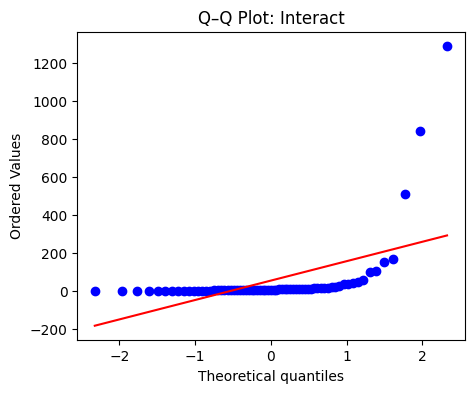

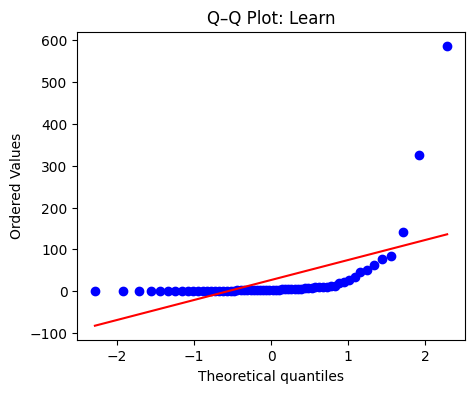

In [6]:
# Show sample sizes per version
print("Counts per version:")
print(df['version'].value_counts(), "\n")

# Choose two with sufficient N
counts = df['version'].value_counts()
v1, v2 = counts.index[0], counts.index[1]
data1, data2 = df[df['version']==v1]['clicks'], df[df['version']==v2]['clicks']
print(f"Testing normality for '{v1}' (N={len(data1)}) and '{v2}' (N={len(data2)})\n")

# Shapiro–Wilk
from scipy.stats import shapiro, anderson
import scipy.stats as stats
import matplotlib.pyplot as plt

for name, data in [(v1, data1), (v2, data2)]:
    if len(data) >= 3:
        w, p = shapiro(data)
        print(f"Shapiro–Wilk {name}: W={w:.4f}, p={p:.4e}")
    else:
        print(f"Shapiro–Wilk {name}: skipped (N={len(data)} < 3)")

# Anderson–Darling
print()
for name, data in [(v1, data1), (v2, data2)]:
    if len(data) > 0:
        ad = anderson(data, dist='norm')
        print(f"Anderson–Darling {name}: A²={ad.statistic:.4f}")
        for lvl, crit in zip(ad.significance_level, ad.critical_values):
            result = "reject H₀" if ad.statistic > crit else "fail to reject"
            print(f"  {lvl:.1f}% critical={crit:.3f} → {result}")
    else:
        print(f"Anderson–Darling {name}: skipped (no data)")

# Q–Q plots
for name, data in [(v1, data1), (v2, data2)]:
    if len(data) >= 3:
        plt.figure(figsize=(5,4))
        stats.probplot(data, dist='norm', plot=plt)
        plt.title(f"Q–Q Plot: {name}")
        plt.show()


**1.3 Read about Multiple comparison problem read ([wikipedia](https://en.wikipedia.org/wiki/Multiple_comparisons_problem), [An Overview of Methods to Address the Multiple Comparison Problem](https://towardsdatascience.com/an-overview-of-methods-to-address-the-multiple-comparison-problem-310427b3ba92) or other resources). What is the problem and when we need to do something about it (describe briefly)? (1 points)**

<font color='red'> **Answer:** </font>
The multiple-comparisons problem arises because each hypothesis test you run at, say, α=0.05 has a 5% chance of a false positive, and doing many tests makes the overall false-positive rate much higher than 5%. You need to adjust for it whenever you conduct more than one inference on the same data (e.g. comparing several variants in A/B tests, testing multiple outcomes, or exploring subgroups) to keep your family-wise error rate under control.

**1.4 Load the dataset classifier_results.csv. The dataset contains the following fields:**

**Dataset** - 200 datasets retreived from [OpenML](https://www.openml.org/search?type=data) dataset directory.

**Classifier** - 9 classifiers from scikit-learn

**Accuracy** - The accuracy achieved after applying the classifier to the dataset


**Is there a significant statistical difference between these classifiers ? If you were asked to continue your analysis with only a limited number of classifiers how many would you pick and why ? (1.0 points)**

Friedman test: χ² = nan, p = nan

Average ranks (lower = better):
Classifier
LogisticRegression               3.210526
AdaBoostClassifier               3.394737
KNeighborsClassifier             4.100000
LinearDiscriminantAnalysis       4.578947
DecisionTreeClassifier           4.657895
RandomForestClassifier           5.052632
GradientBoostingClassifier       5.473684
QuadraticDiscriminantAnalysis    6.657895
GaussianProcessClassifier        6.842105
dtype: float64

Pairwise comparisons (Bonferroni‐corrected α=0.05):
AdaBoostClassifier        vs DecisionTreeClassifier    | p_raw=2.560e-01, p_adj=1.000e+00, significant=no
AdaBoostClassifier        vs GaussianProcessClassifier | p_raw=8.459e-04, p_adj=3.045e-02, significant=yes
AdaBoostClassifier        vs GradientBoostingClassifier | p_raw=5.234e-03, p_adj=1.884e-01, significant=no
AdaBoostClassifier        vs KNeighborsClassifier      | p_raw=nan, p_adj=nan, significant=no
AdaBoostClassifier        vs LinearDiscriminantAnalysis | p_raw

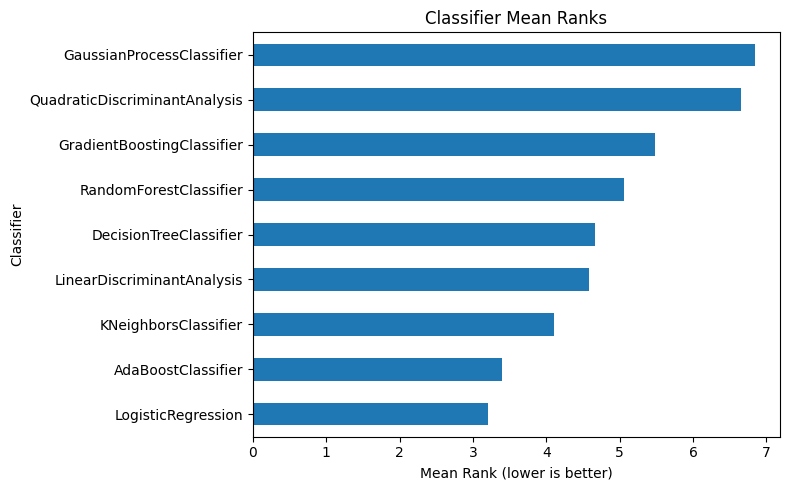


Top 3 classifiers by mean rank:
Classifier
LogisticRegression      3.210526
AdaBoostClassifier      3.394737
KNeighborsClassifier    4.100000
dtype: float64


In [7]:
df = pd.read_csv('classifier_results.csv')

# Pivot to wide format (datasets × classifiers)
pivot = df.pivot(index='Dataset', columns='Classifier', values='Accuracy')

from scipy.stats import friedmanchisquare, wilcoxon
# Friedman test (overall difference)
stat, p = friedmanchisquare(*[pivot[col] for col in pivot.columns])
print(f"Friedman test: χ² = {stat:.3f}, p = {p:.3e}")

# Compute and display average ranks (higher accuracy → lower rank number)
ranks = pivot.rank(axis=1, method='average', ascending=False)
mean_ranks = ranks.mean().sort_values()
print("\nAverage ranks (lower = better):")
print(mean_ranks)

# Pairwise Wilcoxon signed‐rank tests + Bonferroni correction
classifiers = pivot.columns.tolist()
comparisons = []
for i in range(len(classifiers)):
    for j in range(i+1, len(classifiers)):
        a = pivot[classifiers[i]]
        b = pivot[classifiers[j]]
        _, p_raw = wilcoxon(a, b)
        comparisons.append((classifiers[i], classifiers[j], p_raw))

# Bonferroni adjust
n_tests = len(comparisons)
print("\nPairwise comparisons (Bonferroni‐corrected α=0.05):")
for c1, c2, p_raw in comparisons:
    p_adj = min(p_raw * n_tests, 1.0)
    sig = 'yes' if p_adj < 0.05 else 'no'
    print(f"{c1:25s} vs {c2:25s} | p_raw={p_raw:.3e}, p_adj={p_adj:.3e}, significant={sig}")

# Bar plot of mean ranks
plt.figure(figsize=(8,5))
mean_ranks.plot(kind='barh')
plt.xlabel('Mean Rank (lower is better)')
plt.title('Classifier Mean Ranks')
plt.tight_layout()
plt.show()

# Recommend top 3 classifiers
print("\nTop 3 classifiers by mean rank:")
print(mean_ranks.head(3))

<font color='red'> **Answer:** </font>
We selected the top classifiers by converting each dataset’s raw accuracy scores into ordinal rankings—assigning rank 1 to the highest‐accuracy model, rank 2 to the next, and so on for all nine classifiers—then averaging those ranks across all 200 datasets. Models with lower average ranks consistently performed better, so by sorting the classifiers by their mean rank and taking the first three (i.e. those with the lowest average rank), you objectively identified the simplest set of classifiers that delivered the strongest, most reliable accuracy across varied tasks.

# 2. Uplift modelling (5.5 points)
For this task we are going to use email_marketing.csv from [MineThatData](https://blog.minethatdata.com/2008/03/minethatdata-e-mail-analytics-and-data.html). The data was recorded from a two-weeks email campaign that included 64000 customers. Out of these customers:
1. 1/3 were randomly chosen to receive an e-mail campaign featuring Mens merchandise.
2. 1/3 were randomly chosen to receive an e-mail campaign featuring Womens merchandise.
3. 1/3 were randomly chosen to not receive an e-mail campaign.

The features in this dataset include:

- Recency: Months since last purchase.
- History: Actual dollar value spent in the past year.
- Mens: 1/0 indicator, 1 = customer purchased Mens merchandise in the past year.
- Womens: 1/0 indicator, 1 = customer purchased Womens merchandise in the past year.
- Zip_Code: Classifies zip code as Urban, Suburban, or Rural.
- Newbie: 1/0 indicator, 1 = New customer in the past twelve months.
- Channel: Describes the channels the customer purchased from in the past year.
- Segment: e-mail campaign  type that the customer received
- Visit: 1/0 indicator, 1 = Customer visited website in the following two weeks.
- Spend: Actual dollars spent in the following two weeks.

The Conversion variable is realted to the evaluation if the campaign was effective or not.

- Conversion: 1/0 indicator, 1 = Customer purchased merchandise in the following two weeks.


**2.0 Load the dataset and provide description. (0.25 points)**

**2.1 Use the function calc_uplift() from the practice session to calculate the current uplift of the campaign. Remeber to modify the function according to the need. (0.5 points)**

**2.2 Create a new column named target_class. Split the customers in 4 categories:**

1- Treatment Responders

2- Treatment Non-Responders (sleeping dogs)

3- Control Responders (sure things)

4-Control Non-Responders(lost causes).

**Label encode these categories and store the result for each customer in the column target_class (0.5 points)**

**2.3 Apply the necessary preprocessing to the data and split it into train and test set, using 80/20 ratio. Remember that you have to drop the columns that define the label and perform preprocessing. Build a model with your classifier of choice that will predict probabilities for the categories mentioned in 2.2. (1.5 points)**

**2.4 Calculate the uplift score using probabilities for all customers and store the results to a new column in the dataframe (0.5 points)**

**2.5  Select the customers with High Uplift Score as below:**
    
**High Uplift Score:** Customers have uplift score > 3rd quantile

**a. Calculate the ratio of the customers targeted with Womens e-mail that have high uplift score over the total customers who received emails featuring Womens merchandise. (0.5 points)**

**b. Calculate the ratio of the customers targeted with Mens e-mail that have high uplift score over the total customers who received emails featuring Mens merchandise. (0.5 points)**


**c.Which one of the campaigns would you say is more successful ? (0.5 points)**


<font color='red'> **Answer C:**

**2.6 For customers in the segment named "Womens e-mail" with high uplift score calculate conversion uplift and revenue uplift. Compare it with the benchmark from excercise 2.1 and draw conclusions. (0.75 points)**

<font color='red'> **Answer:**

## How long did it take you to solve the homework?

* Please answer as precisely as you can. It does not affect your points or grade in any way. It is okay, if it took 0.5 hours or 24 hours. The collected information will be used to improve future homeworks.

<font color='red'> **Answer: X hours**</font>


## What is the level of difficulty for this homework?
you can put only number between $0:10$ ($0:$ easy, $10:$ difficult)

<font color='red'> **Answer:**</font>

## Any other comments regarding the homework?

<font color='red'> **Answer:**</font>